<a href="https://colab.research.google.com/github/sreevaishnavirao/Image-corruption/blob/main/Image_corruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
pip install pillow opencv-python


In [45]:
from PIL import Image
import numpy as np
import os


def load_image(image_path):
    return Image.open(image_path)

# Add Gaussian noise to an image
def add_noise(image, noise_factor):
    img_array = np.asarray(image)

    # Generate Gaussian noise
    noise = np.random.normal(0, noise_factor, img_array.shape)
    noisy_image = np.clip(img_array + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)


def apply_noise_to_image(image_path):

    image = load_image(image_path)


    if not os.path.exists('corrupted_images'):
        os.makedirs('corrupted_images')


    noise_levels = []
    for i in range(1, 11):
        noise_factor = i * 15
        noisy_image = add_noise(image, noise_factor)
        noisy_image.save(f'corrupted_images/noisy_image_{i}.png')
        noise_levels.append(noise_factor)
        print(f"Saved noisy image {i} with noise factor {noise_factor}")


image_path = '/mnt/mountain.jpg'
apply_noise_to_image(image_path)


Saved noisy image 1 with noise factor 15
Saved noisy image 2 with noise factor 30
Saved noisy image 3 with noise factor 45
Saved noisy image 4 with noise factor 60
Saved noisy image 5 with noise factor 75
Saved noisy image 6 with noise factor 90
Saved noisy image 7 with noise factor 105
Saved noisy image 8 with noise factor 120
Saved noisy image 9 with noise factor 135
Saved noisy image 10 with noise factor 150


In [46]:
import torch
from torchvision import models, transforms
import torch.nn.functional as F
import json

# Load DenseNet-121 model pre-trained on ImageNet
model = models.densenet121(weights='DenseNet121_Weights.IMAGENET1K_V1')
model.eval()

# Load ImageNet class labels
with open('/mnt/imagenet_class_index.json') as f:
    class_idx = json.load(f)

# Preprocessing transformations for input images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


def get_class_name(class_index):
    return class_idx[class_index]

# Classify image and get confidence
def classify_image_with_confidence(image):
    input_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)
        predicted_class_index = output.argmax(dim=1).item()
        confidence = probabilities[0][predicted_class_index].item() * 100
        predicted_class_name = get_class_name(predicted_class_index)
        print(f"Predicted Class Index: {predicted_class_index}")
    return predicted_class_name, confidence

# Classify all noisy images
def classify_noisy_images():

    corrupted_images_dir = 'corrupted_images'


    for i in range(1, 11):
        image_path = os.path.join(corrupted_images_dir, f'noisy_image_{i}.png')
        noisy_image = Image.open(image_path)


        predicted_class_name, confidence = classify_image_with_confidence(noisy_image)


        print(f"Image {i}: Predicted Class = {predicted_class_name}, Confidence = {confidence:.2f}%")

# Classify the corrupted images
classify_noisy_images()


Predicted Class Index: 970
Image 1: Predicted Class = alp, Confidence = 91.61%
Predicted Class Index: 970
Image 2: Predicted Class = alp, Confidence = 81.18%
Predicted Class Index: 970
Image 3: Predicted Class = alp, Confidence = 45.59%
Predicted Class Index: 970
Image 4: Predicted Class = alp, Confidence = 50.11%
Predicted Class Index: 34
Image 5: Predicted Class = leatherback sea turtle, Confidence = 15.26%
Predicted Class Index: 183
Image 6: Predicted Class = Kerry Blue Terrier, Confidence = 3.60%
Predicted Class Index: 164
Image 7: Predicted Class = Bluetick Coonhound, Confidence = 4.76%
Predicted Class Index: 223
Image 8: Predicted Class = Schipperke, Confidence = 18.32%
Predicted Class Index: 223
Image 9: Predicted Class = Schipperke, Confidence = 3.06%
Predicted Class Index: 148
Image 10: Predicted Class = killer whale, Confidence = 8.72%


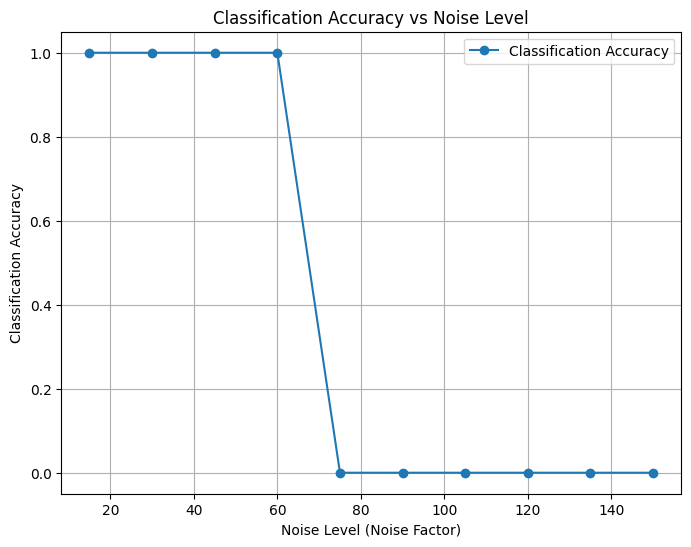

In [49]:


import matplotlib.pyplot as plt



# Classify all noisy images and calculate accuracy
def classify_noisy_images(expected_class_index):
    # Directory containing corrupted (noisy) images
    corrupted_images_dir = 'corrupted_images'

    noise_levels = []
    accuracies = []

    # Loop through each noisy image in the directory
    for i in range(1, 11):
        image_path = os.path.join(corrupted_images_dir, f'noisy_image_{i}.png')
        noisy_image = Image.open(image_path)

        # Classify the noisy image
        predicted_class_index, predicted_class_name, confidence = classify_image_with_confidence(noisy_image)

        # Calculate if the prediction matches the expected class
        accuracy = 1 if predicted_class_index == expected_class_index else 0
        noise_levels.append(i * 15)
        accuracies.append(accuracy)
    return noise_levels, accuracies

# Plot classification accuracy vs noise
def plot_accuracy_vs_noise(noise_levels, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(noise_levels, accuracies, marker='o', label="Classification Accuracy")
    plt.xlabel('Noise Level (Noise Factor)')
    plt.ylabel('Classification Accuracy')
    plt.title('Classification Accuracy vs Noise Level')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    expected_class_index = 970

    # Classify noisy images and get accuracies
    noise_levels, accuracies = classify_noisy_images(expected_class_index)


    plot_accuracy_vs_noise(noise_levels, accuracies)


Image 1: Predicted Class = alp, Confidence = 91.61%
Image 2: Predicted Class = alp, Confidence = 81.18%
Image 3: Predicted Class = alp, Confidence = 45.59%
Image 4: Predicted Class = alp, Confidence = 50.11%
Image 5: Predicted Class = leatherback sea turtle, Confidence = 15.26%
Image 6: Predicted Class = Kerry Blue Terrier, Confidence = 3.60%
Image 7: Predicted Class = Bluetick Coonhound, Confidence = 4.76%
Image 8: Predicted Class = Schipperke, Confidence = 18.32%
Image 9: Predicted Class = Schipperke, Confidence = 3.06%
Image 10: Predicted Class = killer whale, Confidence = 8.72%


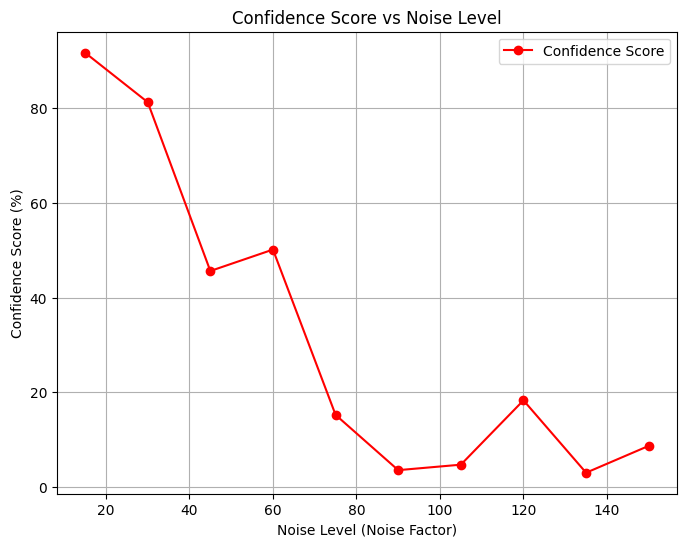

In [50]:




# Classify image and get confidence
def classify_image_with_confidence(image):
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = F.softmax(output, dim=1)  # Get softmax probabilities
        predicted_class_index = output.argmax(dim=1).item()  # Get the class index
        confidence = probabilities[0][predicted_class_index].item() * 100  # Get confidence score
        predicted_class_name = get_class_name(predicted_class_index)
    return predicted_class_index, predicted_class_name, confidence

# Classify all noisy images and calculate confidence
def classify_noisy_images_for_confidence(expected_class_index):
    corrupted_images_dir = 'corrupted_images'

    noise_levels = []
    confidences = []

    for i in range(1, 11):
        image_path = os.path.join(corrupted_images_dir, f'noisy_image_{i}.png')
        noisy_image = Image.open(image_path)


        predicted_class_index, predicted_class_name, confidence = classify_image_with_confidence(noisy_image)

        # Append noise factor and confidence
        noise_levels.append(i * 15)
        confidences.append(confidence)

        # Print the results
        print(f"Image {i}: Predicted Class = {predicted_class_name}, Confidence = {confidence:.2f}%")

    return noise_levels, confidences

# Plot confidence score vs noise level
def plot_confidence_vs_noise(noise_levels, confidences):
    plt.figure(figsize=(8, 6))
    plt.plot(noise_levels, confidences, marker='o', color='r', label="Confidence Score")
    plt.xlabel('Noise Level (Noise Factor)')
    plt.ylabel('Confidence Score (%)')
    plt.title('Confidence Score vs Noise Level')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    expected_class_index = 970

    # Classify noisy images and get confidence scores
    noise_levels, confidences = classify_noisy_images_for_confidence(expected_class_index)


    plot_confidence_vs_noise(noise_levels, confidences)
